# HW0 - Hello Vision World

In this HW you'll get acquainted with OpenCV in a Python-Jupyter environment.

If you're able to read this you were probably successfull at creating a Python-Jupyter environment.

Next we will import OpenCV, which is called `cv2` (that's the name of the OpenCV module) in python.

In [11]:
import cv2
import numpy as np

If that executed without an error - you were also able to install OpenCV.

If that didn't run, try running `pip install opencv-python` or `apt-get install python-opencv` on ubuntu.

Next we will load a test image from scikit-image (`skimage`).

In [12]:
import skimage.data

In [13]:
image = skimage.data.astronaut()

An image is an array of pixels. It has HxWxC shape: (we can interrogate an image for its shape using `.shape`)

In [14]:
image.shape

(512, 512, 3)

This image has Height and Width of 512, and 3 channels: Red, Green, Blue

The channels are the last dimension, meaning the image is stored in memory where every pixel has 3 components, like so: RGB, RGB, RGB, RGB, ...

In [15]:
image[0,0]

array([154, 147, 151], dtype=uint8)

The first pixel in the image has the RGB code: `(154, 147, 151)`, which is kind of a grayish color.

Let's plot out a small patch of the image (10x10 pixels top-left):

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

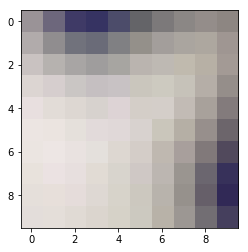

In [17]:
plt.imshow(image[0:10,0:10])

We can do many things with images, such as make them grayscale:

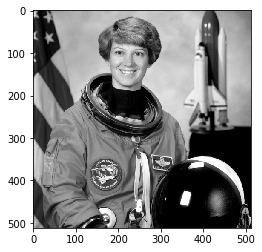

In [18]:
plt.imshow(cv2.cvtColor(image.copy(), cv2.COLOR_RGB2GRAY), cmap='gray')

By default images have values \[0,255\] and their pixels are stored in `uint8` (bytes, unsigned chars)

In [19]:
image.dtype

dtype('uint8')

But we can change that easily, say to 32-bit floating point (e.g. `float32`):

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


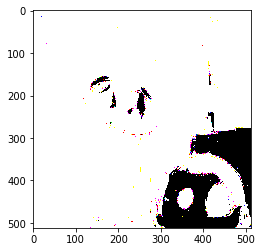

In [20]:
plt.imshow(image.astype(np.float32))

Ah, Matplotlib is complaining that floating point images are usually in range of \[0,1\] and not \[0,255\] like `uint8`s.

So we can easily divide the values element-wise:

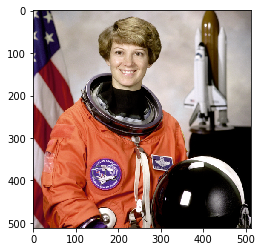

In [21]:
plt.imshow(image.astype(np.float32) / 255.)

Now it looks the same as before.

We can also flip images in different directions:

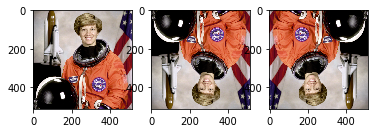

In [38]:
plt.subplot(1,3,1),plt.imshow(cv2.flip(image.copy(), 1))
plt.subplot(1,3,2),plt.imshow(cv2.flip(image.copy(), -1))
plt.subplot(1,3,3),plt.imshow(cv2.flip(image.copy(), 0));

We can blur them:

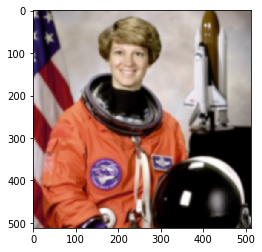

In [39]:
plt.imshow(cv2.GaussianBlur(image.copy(), ksize=(11,11), sigmaX=-1))

---
---

## Here comes your part

<img src="http://thuglifememe.com/wp-content/uploads/2017/08/22-you-got-this-meme-9.jpg"/>

### Image blur

1) Load the astronaut image to a variable, convert to grayscale and convert to a [0,1] floating point.

2) Blur it with a 11x11 **Box filter** (`cv2.boxFilter`), and a 11x11 **Gaussian filter**

3) Subtract the blurred images from the original

4) Show the results to the notebook (`plt.imshow(...)`) side-by-side (`plt.subplot(1,2,1)`), with a colorbar (`plt.colorbar()`)

In [22]:
import skimage.data

In [ ]:
image = skimage.data.astronaut()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<matplotlib.axes._subplots.AxesSubplot at 0x18a7b269978>,
 <matplotlib.colorbar.Colorbar at 0x18a7b291e10>)

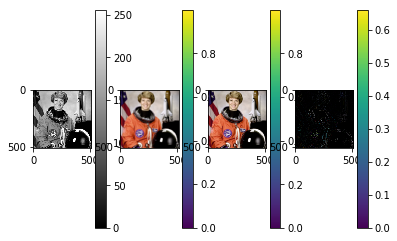

In [148]:
plt.subplot(1,4,1),plt.imshow(cv2.cvtColor(image.copy(), cv2.COLOR_RGB2GRAY), cmap='gray'), plt.colorbar()
float_point = image.astype(np.float32) / 255.
gauss_filter=cv2.GaussianBlur(float_point.copy(), ksize=(11,11), sigmaX=-1)
plt.subplot(1,4,2),plt.imshow(cv2.boxFilter(float_point, -1,(11,11))), plt.colorbar()
plt.subplot(1,4,3),plt.imshow(gauss_filter), plt.colorbar()
subBox=float_point-gauss_filter
plt.subplot(1,4,4),plt.imshow(subBox), plt.colorbar()

In [116]:
subBox=float_point-gauss_filter

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


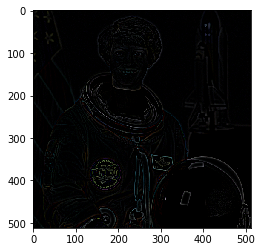

In [119]:
plt.imshow(subBox)

See how subtracting the blur (low frequencies) from the original has left only the edges (high frequencies).

Try different kernel sizes to see the effect on the edges.

### Colorspaces

1) Load the astronaut image (RGB)

2) Convert to HSV (`cv2.cvtColor`)

3) Display the H, S and V components, side-by-side

(<matplotlib.axes._subplots.AxesSubplot at 0x18a77886cc0>,
 <matplotlib.image.AxesImage at 0x18a778dda58>)

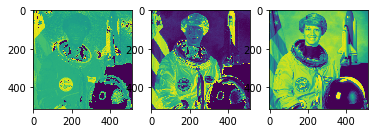

In [69]:
astro = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(astro)
hsv_astro = cv2.cvtColor(astro, cv2.COLOR_RGB2HSV)
#HSV = rgb2hsv(hsv_astro);
H = hsv_astro[:,:,0];
S = hsv_astro[:,:,1];
V = hsv_astro[:,:,2];
plt.subplot(1,3,1),plt.imshow(H)
plt.subplot(1,3,2),plt.imshow(S)
plt.subplot(1,3,3),plt.imshow(V)

### 3D Projection

Consider a group of 3D points. 

We have a 100 uniformly distributed points in a volume XYZ: \[-5,5\],\[-5,5\],\[5,100\] (the units are, say, meters).

Some points are close to us (the camera at `(0,0,0)`), they have low Z values, and some are farther away.

In [55]:
pts3d = np.hstack([np.random.uniform(-5,5,(1000,2)),np.random.uniform(5,100,(1000,1))])[:,np.newaxis,:]

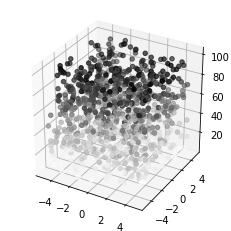

In [88]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pts3d[:,0,0],pts3d[:,0,1],pts3d[:,0,2],c=-pts3d[:,0,2],cmap='gray');
ax.set_aspect('equal');

You're given the following intrinsics matrix (`K`):

In [57]:
K = np.array([[800,0,320],[0,800,240],[0,0,1]], dtype=np.float32)
print(K)

[[800.   0. 320.]
 [  0. 800. 240.]
 [  0.   0.   1.]]


Calculate the 2D projection of the 3D points on the image plane, and plot them (`plt.scatter`).

Try doing the calculation yourself, using matrix multiplication for the entire group, and also using `cv2.projectPoints`.

Try changing the `K` matrix focal length parameters to see how it affects the projection.

In [152]:
import numpy.matlib
import numpy as np
rvec=np.array([0,0,0],np.float)
tvec=np.array([0,0,0],np.float)
result=cv2.projectPoints(pts3d,rvec,tvec,K,None)
for n in range(len(pts3d)):
    print (pts3d[n], '==>', result[0][n])
#fig=plt.figure()
#ax=fig.add_subplot(111, projection='3d')
#ax.scatter(result[:,0,0],result[:,0,1],result[:,0,2],c=-result[:,0,2],cmap='gray');
#ax.set_aspect('equal');
#pts = np.asarray([[p.pt[0], p.pt[1]] for p in result])

[[-0.93609105 -2.26187456 17.89680846]] ==> [[267.69508447 113.61575886]]
[[ 3.79740913 -3.24396378 91.45604779]] ==> [[361.52168416 204.52980578]]
[[-0.58741991 -3.73112114 81.33474538]] ==> [[312.77774949 194.12635618]]
[[ 1.49904808 -1.74538176 73.56973246]] ==> [[340.3758805  216.27581751]]
[[ 4.26507778  4.60668314 64.30194604]] ==> [[386.32890666 311.6414265 ]]
[[-3.80423164  3.31758689 61.16974775]] ==> [[257.80861002 294.23574582]]
[[ 3.8448186  -1.8961059   5.91180125]] ==> [[970.36330416 -80.7323485 ]]
[[2.53101811 3.49119179 6.2631138 ]] ==> [[724.11498012 797.42110044]]
[[-3.46209573  2.78650106 45.41489065]] ==> [[243.76738813 301.35655109]]
[[ 2.21120544  2.08231103 98.78150394]] ==> [[342.38481245 261.07996894]]
[[ 4.3245241   4.55242734 90.55630802]] ==> [[367.75508399 290.27178605]]
[[ 4.76691814 -4.67466235 25.43203517]] ==> [[507.43754133  56.19000143]]
[[ 2.11475821  1.35072492 47.35196971]] ==> [[364.66040634 268.52521091]]
[[-3.81244399 -4.16251237 59.63237494]] =

[[-0.86312604  1.26547786 24.67152493]] ==> [[285.01529442 291.29305405]]
[[-2.17586917  0.53446288 42.62501611]] ==> [[268.95323522 252.53871374]]
[[ 1.94913252  1.53215397 20.32680322]] ==> [[415.88977169 315.37604181]]
[[-4.15866179 -2.82866573 93.72731254]] ==> [[275.63020348 209.82026211]]
[[-2.45357857  2.92049747 17.27013309]] ==> [[177.92937708 409.10683079]]
[[-3.80447538 -2.30232311 78.9678959 ]] ==> [[271.82250532 210.84482141]]
[[ 2.15465304 -3.71135125 84.68339719]] ==> [[345.44363019 196.17380293]]
[[-1.60590405 -4.74253775 49.6580722 ]] ==> [[287.66076528 144.49613644]]
[[-4.10880189 -2.8401948  51.34397341]] ==> [[239.97499178 184.68299564]]
[[-0.51818437  2.22286037 32.42924309]] ==> [[304.02107714 308.54493519]]
[[-1.22221852  2.19988804 83.64367092]] ==> [[305.38779438 266.30071135]]
[[-0.73983393 -1.2632329  75.68730208]] ==> [[310.22512485 223.3098437 ]]
[[-1.18615188 -4.76094113 24.67877795]] ==> [[271.93636084  47.08359465]]
[[-0.21105    -0.12061614 18.11103638]

[[-2.65492205e-02  3.53835942e+00  4.85724205e+01]] ==> [[319.45340956 312.84708861]]
[[-0.0961261  -0.5639729  77.46496842]] ==> [[318.75910228 232.71963948]]
[[-2.44843609 -1.20125823 24.4119773 ]] ==> [[219.70349161 190.79226013]]
[[ 4.07079241  2.4379487  98.91996368]] ==> [[361.15238482 264.64566919]]
[[ 1.96714674  2.48326557 27.0894988 ]] ==> [[392.61657941 331.6689374 ]]
[[-2.62212638  2.70253853 82.50343155]] ==> [[288.21797189 272.75668034]]
[[ 2.73048739  3.62801594 96.77380055]] ==> [[348.21515091 277.48965027]]
[[-0.50782292 -2.40111714 39.50848647]] ==> [[307.14648502 179.22528149]]
[[ 1.37711571e+00 -2.15890558e-02  3.09850435e+01]] ==> [[364.4445304  239.30324268]]
[[ 1.77082723  2.63112569 35.02473562]] ==> [[370.55933178 315.1219286 ]]
[[ 1.06618368 -0.68253177 86.47790749]] ==> [[332.32897182 232.1074435 ]]
[[ 3.64165061 -0.07930721 47.28221329]] ==> [[397.01946168 238.32268412]]
[[ 1.00055956 -4.29476086 19.85643188]] ==> [[370.38969571  23.70933499]]
[[ 3.98587229 

(1000, 1, 3)


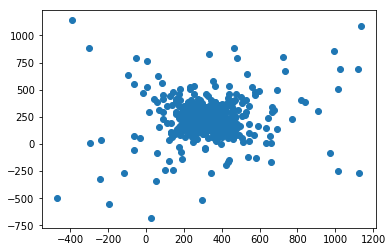

In [151]:
x = result[0][:,:,0]
y = result[0][:,:,1]
#N = len(pts3d)
#x = result.pt[0]
#y = result.pt[1]
#colors = (0,0,0)
#area = np.pi*3
 
# Plot
plt.scatter(x, y)
print(pts3d.shape)

In [ ]:
a=pts3d.reshape(1000,3)
c=np.matmul(K,a.transpose())
d=[[c[0,:]/c[2,:]],[c[1,:]/c[2,:]]]
print (d)

In [155]:
#changing focal length in K
K = np.array([[400,0,320],[0,400,240],[0,0,1]], dtype=np.float32)
print(K)
import numpy.matlib
import numpy as np
rvec=np.array([0,0,0],np.float)
tvec=np.array([0,0,0],np.float)
result=cv2.projectPoints(pts3d,rvec,tvec,K,None)
for n in range(len(pts3d)):
    print (pts3d[n], '==>', result[0][n])

[[400.   0. 320.]
 [  0. 400. 240.]
 [  0.   0.   1.]]
[[-0.93609105 -2.26187456 17.89680846]] ==> [[299.07803379 189.44630355]]
[[ 3.79740913 -3.24396378 91.45604779]] ==> [[336.60867366 225.81192231]]
[[-0.58741991 -3.73112114 81.33474538]] ==> [[317.1110998  221.65054247]]
[[ 1.49904808 -1.74538176 73.56973246]] ==> [[328.1503522 230.510327 ]]
[[ 4.26507778  4.60668314 64.30194604]] ==> [[346.53156266 268.6565706 ]]
[[-3.80423164  3.31758689 61.16974775]] ==> [[295.12344401 261.69429833]]
[[ 3.8448186  -1.8961059   5.91180125]] ==> [[580.14532167 111.7070606 ]]
[[2.53101811 3.49119179 6.2631138 ]] ==> [[481.64599205 462.96844017]]
[[-3.46209573  2.78650106 45.41489065]] ==> [[289.50695525 264.54262043]]
[[ 2.21120544  2.08231103 98.78150394]] ==> [[328.95392498 248.43198758]]
[[ 4.3245241   4.55242734 90.55630802]] ==> [[339.1020336  260.10871442]]
[[ 4.76691814 -4.67466235 25.43203517]] ==> [[394.97501653 166.47600057]]
[[ 2.11475821  1.35072492 47.35196971]] ==> [[337.86416254 251

[[-1.68452634 -1.28308924 77.31957242]] ==> [[311.28538201 233.36215034]]
[[ 3.69615199  4.16022738 46.79817294]] ==> [[351.592276  275.5588872]]
[[-0.86312604  1.26547786 24.67152493]] ==> [[306.00611777 260.51722162]]
[[-2.17586917  0.53446288 42.62501611]] ==> [[299.58129409 245.0154855 ]]
[[ 1.94913252  1.53215397 20.32680322]] ==> [[358.35590867 270.15041673]]
[[-4.15866179 -2.82866573 93.72731254]] ==> [[302.25208139 227.92810484]]
[[-2.45357857  2.92049747 17.27013309]] ==> [[263.17175083 307.64273231]]
[[-3.80447538 -2.30232311 78.9678959 ]] ==> [[300.72900213 228.33792857]]
[[ 2.15465304 -3.71135125 84.68339719]] ==> [[330.17745207 222.46952117]]
[[-1.60590405 -4.74253775 49.6580722 ]] ==> [[307.06430611 201.79845457]]
[[-4.10880189 -2.8401948  51.34397341]] ==> [[287.98999671 217.87319825]]
[[-0.51818437  2.22286037 32.42924309]] ==> [[313.60843086 267.41797408]]
[[-1.22221852  2.19988804 83.64367092]] ==> [[314.15511775 250.52028454]]
[[-0.73983393 -1.2632329  75.68730208]] 

[[-2.91168273 -1.65942033 78.84698097]] ==> [[305.22869134 231.58156566]]
[[-0.69495238 -3.20117961 75.69213206]] ==> [[316.32747892 223.08315794]]
[[ 1.72549651 -2.08799695  5.09991279]] ==> [[455.33537364  76.23273294]]
[[ 0.96176782  2.2239326  31.45251512]] ==> [[332.23136295 268.28304942]]
[[ 1.70075929  2.60928375 65.81345433]] ==> [[330.33684866 255.85866462]]
[[-3.21784333  4.98506805 33.74099225]] ==> [[281.85241611 299.098061  ]]
[[ 3.77418255 -4.94370396 81.6700233 ]] ==> [[338.4850323 215.786935 ]]
[[ 0.83493916 -4.22448651 68.50944781]] ==> [[324.87488479 215.33486757]]
[[-0.62052836  0.32143454 88.46119494]] ==> [[317.19412172 241.45344876]]
[[-2.65492205e-02  3.53835942e+00  4.85724205e+01]] ==> [[319.78136383 269.13883545]]
[[-0.0961261  -0.5639729  77.46496842]] ==> [[319.50364091 237.08785579]]
[[-2.44843609 -1.20125823 24.4119773 ]] ==> [[279.88139664 220.31690405]]
[[ 4.07079241  2.4379487  98.91996368]] ==> [[336.46095393 249.85826768]]
[[ 1.96714674  2.48326557 27

(1000, 1, 3)


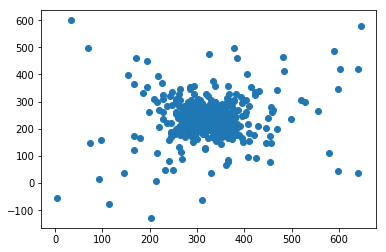

In [157]:
x = result[0][:,:,0]
y = result[0][:,:,1]
#N = len(pts3d)
#x = result.pt[0]
#y = result.pt[1]
#colors = (0,0,0)
#area = np.pi*3
 
# Plot
plt.scatter(x, y)
print(pts3d.shape)

Consider a 3D cube:

In [50]:
# cube veritces
Z = np.array([[-1,-1,-1],[1,-1,-1],[1,1,-1],[-1,1,-1],[-1,-1,1],[1,-1,1],[1,1,1],[-1,1,1]])
Z[:,2] += 10 # translate on Z
Z[:,0] += 2  # translate on X

# list of faces
faces = [[Z[0],Z[1],Z[2],Z[3]],
         [Z[4],Z[5],Z[6],Z[7]], 
         [Z[0],Z[1],Z[5],Z[4]], 
         [Z[2],Z[3],Z[7],Z[6]], 
         [Z[1],Z[2],Z[6],Z[5]],
         [Z[4],Z[7],Z[3],Z[0]]]

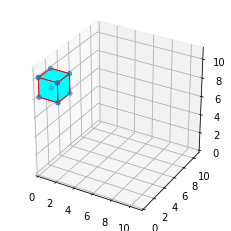

In [111]:
# Plot the cube in 3D
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.add_collection3d(Poly3DCollection(faces, facecolors='cyan', linewidths=1, edgecolors='r', alpha=.75))
ax.scatter(Z[:,0], Z[:,1], Z[:,2])
ax.set_xlim(0,11), ax.set_ylim(0,11), ax.set_zlim(0,11)
ax.set_aspect('equal') # uniform scale axes

Use the same method from before to project the 3D points to 2D

In [128]:
q=Z.reshape(8,1,3)
q=q.astype(np.float32)
print(q.shape)
pts2d,jcb=cv2.projectPoints(q,rvec,tvec,K,None)
print(pts2d.shape)

(8, 1, 3)
(8, 1, 2)


In [129]:
# list of 2D faces
faces2d = [[pts2d[0],pts2d[1],pts2d[2],pts2d[3]],
           [pts2d[4],pts2d[5],pts2d[6],pts2d[7]], 
           [pts2d[0],pts2d[1],pts2d[5],pts2d[4]], 
           [pts2d[2],pts2d[3],pts2d[7],pts2d[6]], 
           [pts2d[1],pts2d[2],pts2d[6],pts2d[5]],
           [pts2d[4],pts2d[7],pts2d[3],pts2d[0]]]

Now we can plot the cube projected on our 2D image:

(0, 480)

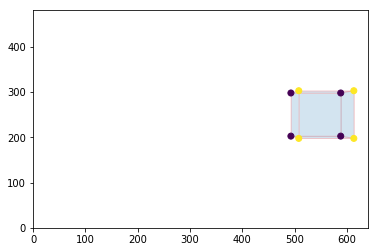

In [149]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
patches = []
for p in np.array(faces2d):
    patches += [Polygon(np.squeeze(p), True)]

fig=plt.figure()
ax = fig.add_subplot(111)
ax.add_collection(PatchCollection(patches, alpha=0.1, linewidths=1, edgecolors='r'))
ax.scatter(pts2d[:,0,0],pts2d[:,0,1],c=-Z[:,2])
ax.set_xlim(0,640)
ax.set_ylim(0,480)

Try to change the translation of the 3D points, as well as the K matrix, and see how it affects the 2D projection.

In [141]:
K = np.array([[1000,0,350],[0,1000,250],[0,0,1]], dtype=np.float32)
print(K)

[[1000.    0.  350.]
 [   0. 1000.  250.]
 [   0.    0.    1.]]


In [142]:
# cube veritces
Z = np.array([[-1,-1,-1],[1,-1,-1],[1,1,-1],[-1,1,-1],[-1,-1,1],[1,-1,1],[1,1,1],[-1,1,1]])
Z[:,2] += 20 # translate on Z
Z[:,0] += 4  # translate on X

# list of faces
faces = [[Z[0],Z[1],Z[2],Z[3]],
         [Z[4],Z[5],Z[6],Z[7]], 
         [Z[0],Z[1],Z[5],Z[4]], 
         [Z[2],Z[3],Z[7],Z[6]], 
         [Z[1],Z[2],Z[6],Z[5]],
         [Z[4],Z[7],Z[3],Z[0]]]

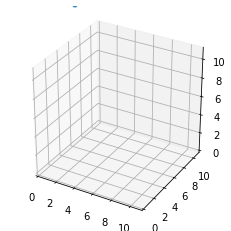

In [144]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.add_collection3d(Poly3DCollection(faces, facecolors='cyan', linewidths=1, edgecolors='r', alpha=.75))
ax.scatter(Z[:,0], Z[:,1], Z[:,2])
ax.set_xlim(0,11), ax.set_ylim(0,11), ax.set_zlim(0,11)
ax.set_aspect('equal') # uniform scale axes

In [145]:
q=Z.reshape(8,1,3)
q=q.astype(np.float32)
print(q.shape)
pts2d,jcb=cv2.projectPoints(q,rvec,tvec,K,None)
print(pts2d.shape)

(8, 1, 3)
(8, 1, 2)


In [146]:
# list of 2D faces
faces2d = [[pts2d[0],pts2d[1],pts2d[2],pts2d[3]],
           [pts2d[4],pts2d[5],pts2d[6],pts2d[7]], 
           [pts2d[0],pts2d[1],pts2d[5],pts2d[4]], 
           [pts2d[2],pts2d[3],pts2d[7],pts2d[6]], 
           [pts2d[1],pts2d[2],pts2d[6],pts2d[5]],
           [pts2d[4],pts2d[7],pts2d[3],pts2d[0]]]

(0, 480)

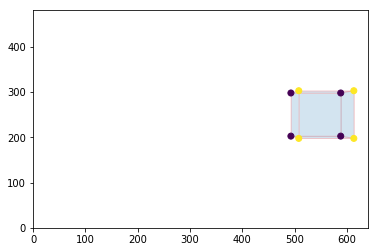

In [147]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
patches = []
for p in np.array(faces2d):
    patches += [Polygon(np.squeeze(p), True)]

fig=plt.figure()
ax = fig.add_subplot(111)
ax.add_collection(PatchCollection(patches, alpha=0.1, linewidths=1, edgecolors='r'))
ax.scatter(pts2d[:,0,0],pts2d[:,0,1],c=-Z[:,2])
ax.set_xlim(0,640)
ax.set_ylim(0,480)
